# Concise Implementation of Softmax Regression
 
On Fashion_MNIST dataset

*NOTE:*

Just as high-level APIs of deep learning frameworks
made it much easier
to implement linear regression in `sec_linear_concise`,
we will find it similarly (or possibly more)
convenient for implementing classification models. Let us stick with the Fashion-MNIST dataset
and keep the batch size at 256 as in `sec_softmax_scratch`.


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from d2l import torch as d2l
import torch
from torch import nn
from torch.utils import data

In [7]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


In [8]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, nb. of examples
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        updater.zero_grad()
        l.backward()
        updater.step()
        metric.add(float(l) * len(y), d2l.accuracy(y_hat, y), y.size().numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [9]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """Train a model (defined in Chapter 3)."""
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    return train_loss, train_acc

Loss:  0.6936276385943095
Accuracy:  0.7816833333333333


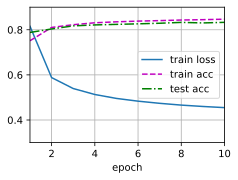

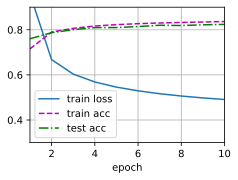

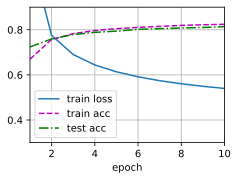

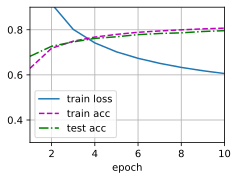

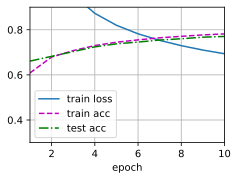

In [10]:
%matplotlib inline

batch_size = [32, 64, 128, 256, 512]     #[50, 100, 200, 256]
learning_rate = [0.01] # [0.01 , 0.1, 0.3]
epochs = [10]
acc = list()

loss = nn.CrossEntropyLoss()

for b in batch_size:
    for l in learning_rate:
        for e in epochs:
            print(f'batch_size: {b} - learning_rate: {l} - epochs {e}')
            train_iter, test_iter = d2l.load_data_fashion_mnist(b)
            net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

            net.apply(init_weights);
            trainer = torch.optim.SGD(net.parameters(), lr=l)
            
            train_loss, train_acc = train_ch3(net, train_iter, test_iter, loss, e, trainer)
            print("Loss: ", train_loss)
            print("Accuracy: ", train_acc)
            acc.append(train_acc)
    

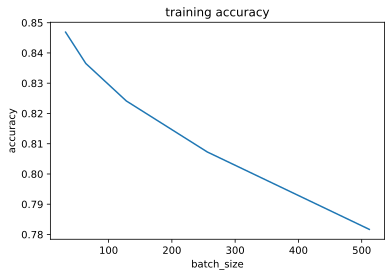

In [11]:
plt.plot(batch_size, acc)
plt.xlabel('batch_size')
plt.ylabel('accuracy')
plt.title('training accuracy')
plt.show()

As before, this algorithm converges to a solution
that achieves a decent accuracy,
albeit this time with fewer lines of code than before.



## Summary

* Using high-level APIs, we can implement softmax regression much more concisely.
* From a computational perspective, implementing softmax regression has intricacies. Note that in many cases, a deep learning framework takes additional precautions beyond these most well-known tricks to ensure numerical stability, saving us from even more pitfalls that we would encounter if we tried to code all of our models from scratch in practice.



## Exercises

1. Try adjusting the hyperparameters, such as the batch size [50, 100, 200, 256 * ], number of epochs [10 * , 30, 50] , and learning rate [0.01 * , 0.1, 0.3], and plot the accuracy vs the hyperparameters (ome plot for each hyperparameter) to highlight the best. When exploring one parameter, fix the others as 

1. Increasing the number of epochs for training. Why might the test accuracy decrease after a while? How could we fix this?
